In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
#read dataset 
df = pd.read_csv("ionosphere_data.csv")

In [3]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [5]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [6]:
#Label Encoding
df['label']=df['label'].map({'b':0,'g':1})

#Training validation and testing spliting data with ratio 60% 20% 20%
train_data , validation_data , testing_data = np.split(df.sample(frac=1 , random_state=42),
                                                      [int(.6*len(df)),int(.8*len(df))])

In [7]:
print(len(train_data))
print(len(validation_data))
print(len(testing_data))

210
70
71


In [8]:
#Traing Data
x_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
#Validation data
x_val = validation_data.iloc[:,:-1]
y_val = validation_data.iloc[:,-1]
#testing Data
x_test = testing_data.iloc[:,:-1]
y_test = testing_data.iloc[:,-1]

In [9]:
#Define Network Structure 
import tensorflow as tf

In [10]:
#With Relu Function

In [11]:
netwrok = tf.keras.models.Sequential()
netwrok.add(tf.keras.layers.Dense(32 , activation='relu' , input_shape=(34,)))
netwrok.add(tf.keras.layers.Dense(16 , activation='relu' ))
netwrok.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

In [12]:
netwrok.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1120      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [13]:
netwrok.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy,
                metrics=['acc'])

In [14]:
#label encoder
np.unique(df[['label']])

array([0, 1], dtype=int64)

In [15]:
#train model 
history = netwrok.fit(x_train , y_train , epochs=100 , batch_size=32 ,validation_data=(x_val,y_val) ,
                      validation_batch_size=32 , workers=1)

Epoch 1/100
7/7 [==============================] - 2s 205ms/step - loss: 0.7222 - acc: 0.3798 - val_loss: 0.6724 - val_acc: 0.6000
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6680 - acc: 0.6862 - val_loss: 0.6374 - val_acc: 0.7143
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6088 - acc: 0.7901 - val_loss: 0.6118 - val_acc: 0.7000
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5798 - acc: 0.7937 - val_loss: 0.5921 - val_acc: 0.7000
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5570 - acc: 0.7690 - val_loss: 0.5739 - val_acc: 0.7000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5424 - acc: 0.7634 - val_loss: 0.5563 - val_acc: 0.6857
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5171 - acc: 0.7819 - val_loss: 0.5391 - val_acc: 0.6857
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4634 - acc: 0.8123 - v

7/7 [==============================] - 0s 7ms/step - loss: 0.0678 - acc: 0.9818 - val_loss: 0.1849 - val_acc: 0.9429
Epoch 65/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0643 - acc: 0.9843 - val_loss: 0.1805 - val_acc: 0.9429
Epoch 66/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0728 - acc: 0.9805 - val_loss: 0.1796 - val_acc: 0.9429
Epoch 67/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0514 - acc: 0.9901 - val_loss: 0.1813 - val_acc: 0.9429
Epoch 68/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0466 - acc: 0.9915 - val_loss: 0.1808 - val_acc: 0.9429
Epoch 69/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0676 - acc: 0.9771 - val_loss: 0.1779 - val_acc: 0.9429
Epoch 70/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0539 - acc: 0.9877 - val_loss: 0.1802 - val_acc: 0.9429
Epoch 71/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0814 - acc: 0.9706 - val_loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


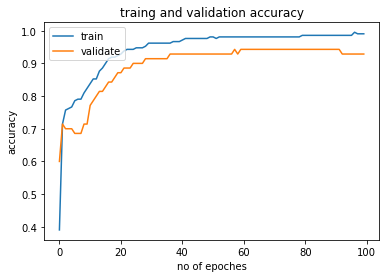

In [16]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("traing and validation accuracy")
plt.legend(['train', 'validate'], loc='upper left')
plt.xlabel("no of epoches")
plt.ylabel("accuracy")
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


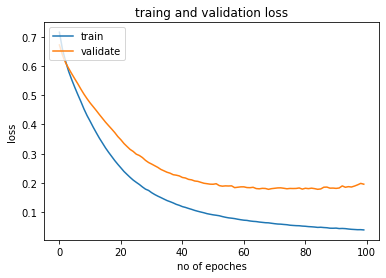

In [17]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("traing and validation loss")
plt.legend(['train', 'validate'], loc='upper left')
plt.xlabel("no of epoches")
plt.ylabel("loss")
plt.show()

In [18]:
netwrok.evaluate(x_test ,y_test, batch_size=32)

3/3 [==============================] - 0s 2ms/step - loss: 0.1658 - acc: 0.9296


[0.16580785810947418, 0.9295774698257446]

In [19]:
#With tanh activation Function and rmsprop optimizer 
from tensorflow.keras import regularizers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32 , kernel_regularizer=regularizers.l2(0.001), activation='tanh' , input_shape=(34,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16 , kernel_regularizer=regularizers.l2(0.001), activation='tanh' ))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                1120      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='rmsprop' , loss='binary_crossentropy' , metrics=['acc'])

In [22]:
#train model 
history = netwrok.fit(x_train , y_train , epochs=100 , batch_size=32 ,validation_data=(x_val,y_val) ,
                      validation_batch_size=32)

Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0384 - acc: 0.9952 - val_loss: 0.1957 - val_acc: 0.9286
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0385 - acc: 0.9952 - val_loss: 0.1901 - val_acc: 0.9286
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0385 - acc: 0.9952 - val_loss: 0.1949 - val_acc: 0.9286
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0367 - acc: 0.9952 - val_loss: 0.1951 - val_acc: 0.9286
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0362 - acc: 0.9952 - val_loss: 0.1964 - val_acc: 0.9286
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0367 - acc: 0.9952 - val_loss: 0.2032 - val_acc: 0.9143
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0354 - acc: 0.9952 - val_loss: 0.1978 - val_acc: 0.9286
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0353 - acc: 0.9952 - va

7/7 [==============================] - 0s 7ms/step - loss: 0.0161 - acc: 0.9952 - val_loss: 0.2860 - val_acc: 0.9000
Epoch 65/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - acc: 0.9952 - val_loss: 0.3066 - val_acc: 0.9000
Epoch 66/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0164 - acc: 0.9952 - val_loss: 0.2922 - val_acc: 0.9000
Epoch 67/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.2937 - val_acc: 0.9000
Epoch 68/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0151 - acc: 0.9952 - val_loss: 0.2971 - val_acc: 0.9000
Epoch 69/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.2979 - val_acc: 0.9000
Epoch 70/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.2959 - val_acc: 0.9000
Epoch 71/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0146 - acc: 0.9952 - val_loss

In [23]:
model.evaluate(x_test,y_test ,batch_size=32)

3/3 [==============================] - 0s 2ms/step - loss: 0.6853 - acc: 0.7521


[0.681601881980896, 0.7464788556098938]

In [24]:
y_test

304    1
236    0
207    1
212    0
319    1
      ..
71     0
106    0
270    1
348    1
102    0
Name: label, Length: 71, dtype: int64

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


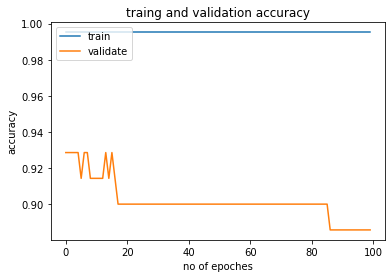

In [25]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("traing and validation accuracy")
plt.legend(['train', 'validate'], loc='upper left')
plt.xlabel("no of epoches")
plt.ylabel("accuracy")
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


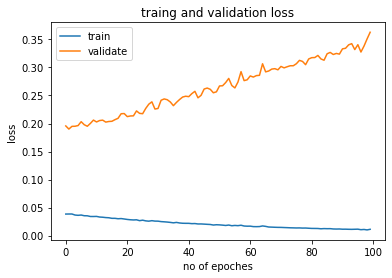

In [28]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("traing and validation loss")
plt.legend(['train', 'validate'], loc='upper left')
plt.xlabel("no of epoches")
plt.ylabel("loss")
plt.show()

In [29]:
#Result of after reduce the layers 
netwrok = tf.keras.models.Sequential()
netwrok.add(tf.keras.layers.Dense(4 , activation='tanh' , input_shape=(34,)))
model.add(tf.keras.layers.Dropout(0.5))
netwrok.add(tf.keras.layers.Dense(16 , activation='tanh' ))
model.add(tf.keras.layers.Dropout(0.5))
netwrok.add(tf.keras.layers.Dense(1 , activation='sigmoid'))
netwrok.compile(optimizer='rmsprop', loss=tf.keras.losses.binary_crossentropy,
                metrics=['acc'])

In [30]:
netwrok.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 140       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [31]:
#train model 
history = netwrok.fit(x_train , y_train , epochs=100 , batch_size=32 ,validation_data=(x_val,y_val) ,
                      validation_batch_size=32 , workers=1)

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.7003 - acc: 0.4880 - val_loss: 0.7060 - val_acc: 0.4571
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6608 - acc: 0.5597 - val_loss: 0.6857 - val_acc: 0.5714
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6250 - acc: 0.6985 - val_loss: 0.6692 - val_acc: 0.6286
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6174 - acc: 0.7709 - val_loss: 0.6554 - val_acc: 0.7000
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5912 - acc: 0.7790 - val_loss: 0.6456 - val_acc: 0.7000
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5775 - acc: 0.7515 - val_loss: 0.6384 - val_acc: 0.7000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5641 - acc: 0.7525 - val_loss: 0.6320 - val_acc: 0.6857
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5604 - acc: 0.7526 - va

7/7 [==============================] - 0s 7ms/step - loss: 0.2835 - acc: 0.8749 - val_loss: 0.4334 - val_acc: 0.8571
Epoch 65/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2899 - acc: 0.8829 - val_loss: 0.4326 - val_acc: 0.8571
Epoch 66/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2569 - acc: 0.9087 - val_loss: 0.4282 - val_acc: 0.8571
Epoch 67/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2441 - acc: 0.9125 - val_loss: 0.4267 - val_acc: 0.8571
Epoch 68/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2486 - acc: 0.9033 - val_loss: 0.4269 - val_acc: 0.8571
Epoch 69/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2288 - acc: 0.9235 - val_loss: 0.4238 - val_acc: 0.8571
Epoch 70/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2346 - acc: 0.9197 - val_loss: 0.4246 - val_acc: 0.8571
Epoch 71/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2451 - acc: 0.9145 - val_loss

In [32]:
netwrok.evaluate(x_test,y_test , batch_size=32)

3/3 [==============================] - 0s 2ms/step - loss: 0.2154 - acc: 0.9155


[0.2154122143983841, 0.9154929518699646]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


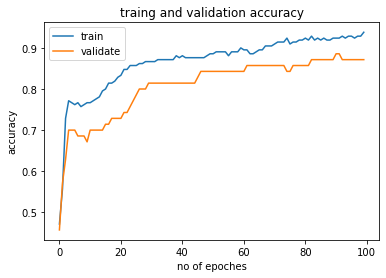

In [33]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("traing and validation accuracy")
plt.legend(['train', 'validate'], loc='upper left')
plt.xlabel("no of epoches")
plt.ylabel("accuracy")
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


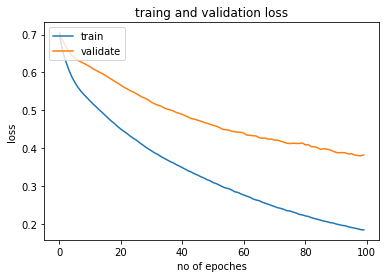

In [35]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("traing and validation loss")
plt.legend(['train', 'validate'], loc='upper left')
plt.xlabel("no of epoches")
plt.ylabel("loss")
plt.show()